In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('spam.tsv', sep='\t') # creating dataframe to store the data
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
label      5572 non-null object
message    5572 non-null object
length     5572 non-null int64
punct      5572 non-null int64
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
...    ...                                                ...     ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[5572 rows x 4 columns]>

In [6]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df.isnull().sum() 

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
ham=df[df['label']=='ham'] 
ham

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5565,ham,Huh y lei...,12,3
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [9]:
spam=df[df['label']=='spam']   # partisioning data into spam
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [10]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [11]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [12]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,Hey loverboy! I love you !! I had to tell ... ...,158,16
1,ham,"Dear,Me at cherthala.in case u r coming cochin...",169,6
2,ham,Dont know you bring some food,29,0
3,ham,Tell rob to mack his gf in the theater,38,0
4,ham,Are you wet right now?,22,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


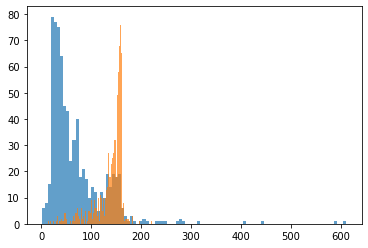

In [13]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

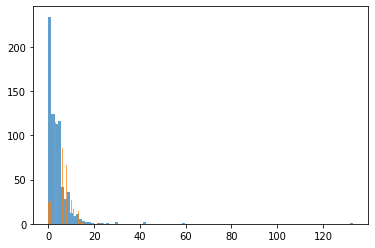

In [14]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show() 

In [15]:
from sklearn.model_selection import train_test_split   # importing module for splitting data into training and testing
from sklearn.ensemble import RandomForestClassifier    # Importing Classifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix     # importing required methods from metrics module
from sklearn.pipeline import Pipeline                  # importing module for pipelining of data
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,shuffle=True,stratify=data['label']) 

In [17]:
x_train.shape  

(1045,)

y_train 

In [18]:
x_train  

1295    87077: Kick off a new season with 2wks FREE go...
1418    goldviking (29/M) is inviting you to be his fr...
588                              You can never do NOTHING
235                      Will you come online today night
1462    XMAS iscoming & ur awarded either £500 CD gift...
                              ...                        
558               K, if u bored up just come to my home..
1018    Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
1262    Double Mins & 1000 txts on Orange tariffs. Lat...
789     HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
4                                  Are you wet right now?
Name: message, Length: 1045, dtype: object

In [19]:
vectorizer=TfidfVectorizer()   

In [20]:
X_train=vectorizer.fit_transform(x_train)

In [21]:
X_train.shape 

(1045, 3686)

In [22]:
X_train

<1045x3686 sparse matrix of type '<class 'numpy.float64'>'
	with 17580 stored elements in Compressed Sparse Row format>

In [23]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [24]:
clf.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [25]:
y_prediction=clf.predict(x_test) 

In [26]:
confusion_matrix(y_test,y_prediction) 

array([[222,   2],
       [ 21, 204]], dtype=int64)

In [27]:
accuracy_score(y_test,y_prediction) 

0.9487750556792873

In [28]:
clf.predict(['hey,this is a mail from kaggle to know your consern about the offer letter send to you. please pay $5000 to join on the given no. 9999******'])      # Checking for new input


array(['spam'], dtype=object)

In [29]:
clf.predict(['this is a google verified mail to tell that your account was logged in from different device '])   

array(['ham'], dtype=object)

In [30]:
from sklearn.svm import SVC

In [31]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1,gamma='auto'))])

In [32]:
clf.fit(x_train,y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',

In [33]:
y_pred=clf.predict(x_test) 

In [34]:
confusion_matrix(y_test,y_pred) 

array([[224,   0],
       [225,   0]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred) 

0.49888641425389757